# <center><font color="blue">Assignment-2 </center>

## Import Libraries

In [1]:
%matplotlib inline 
# for plotting graphs
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt

## Load and review data

In [2]:
bank= pd.read_csv("C:/Users/Renick Andrews/Downloads/AIML project-2/Bank_Personal_Loan_Modelling.csv")

In [3]:
bank.shape # Check number of columns and rows in data frame

(5000, 14)

In [4]:
bank.head() # To check first 5 rows of data set

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### 1- We can see that most of the columns are categorical data, such as Education, Mortgage, PL, SA, CD, Online, Credit 

In [5]:
bank.isnull().values.any() # If there are any null values in data set

False

In [6]:
bank.dtypes # Checking the data types

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

### 3: Our target columns (before checking corelation) would be all the columns except Zipcode and ID <br> The categorical data is of int64 data type. We can convert them using "astype('category')"

In [7]:
bank = bank.drop(labels = "ID", axis = 1) 
bank= bank.drop(labels= "ZIP Code", axis = 1) #Drop ID and Zip Code as it does not help in model attributes
bank.columns = [c.replace(' ', '_') for c in bank.columns] #Replace space with Underscore
bank['Personal_Loan'] = bank.Personal_Loan.astype('category') #Convert to Category
bank.dtypes # 

Age                      int64
Experience               int64
Income                   int64
Family                   int64
CCAvg                  float64
Education                int64
Mortgage                 int64
Personal_Loan         category
Securities_Account       int64
CD_Account               int64
Online                   int64
CreditCard               int64
dtype: object

## Identify Correlation in data 

In [8]:
bank.corr() # It will show correlation matrix 

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
Age,1.000000,0.994215,-0.055269,-0.046418,-0.052012,0.041334,-0.012539,-0.000436,0.008043,0.013702,0.007681
Experience,0.994215,1.000000,-0.046574,-0.052563,-0.050077,0.013152,-0.010582,-0.001232,0.010353,0.013898,0.008967
Income,-0.055269,-0.046574,1.000000,-0.157501,0.645984,-0.187524,0.206806,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.052563,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.050077,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013152,-0.187524,0.064929,-0.136124,1.000000,-0.033327,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010582,0.206806,-0.020445,0.109905,-0.033327,1.000000,-0.005411,0.089311,-0.005995,-0.007231
Securities_Account,-0.000436,-0.001232,-0.002616,0.019994,0.015086,-0.010812,-0.005411,1.000000,0.317034,0.012627,-0.015028
CD_Account,0.008043,0.010353,0.169738,0.014110,0.136534,0.013934,0.089311,0.317034,1.000000,0.175880,0.278644
Online,0.013702,0.013898,0.014206,0.010354,-0.003611,-0.015004,-0.005995,0.012627,0.175880,1.000000,0.004210


### 2: We can observe that the Personal Loan largely depends upon Income (0.5),<br>CCAvg (Average spending on Credit Card- 0.3) and CD Account (Deposit) (0.3). <br> This can also be our Target Columns

In [9]:
# However we want to see correlation in graphical representation so below is function for that
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

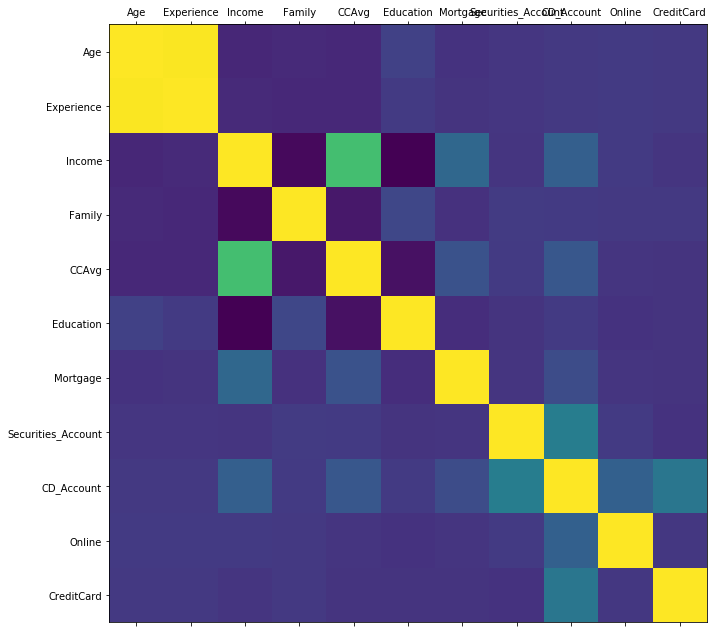

In [10]:
plot_corr(bank)

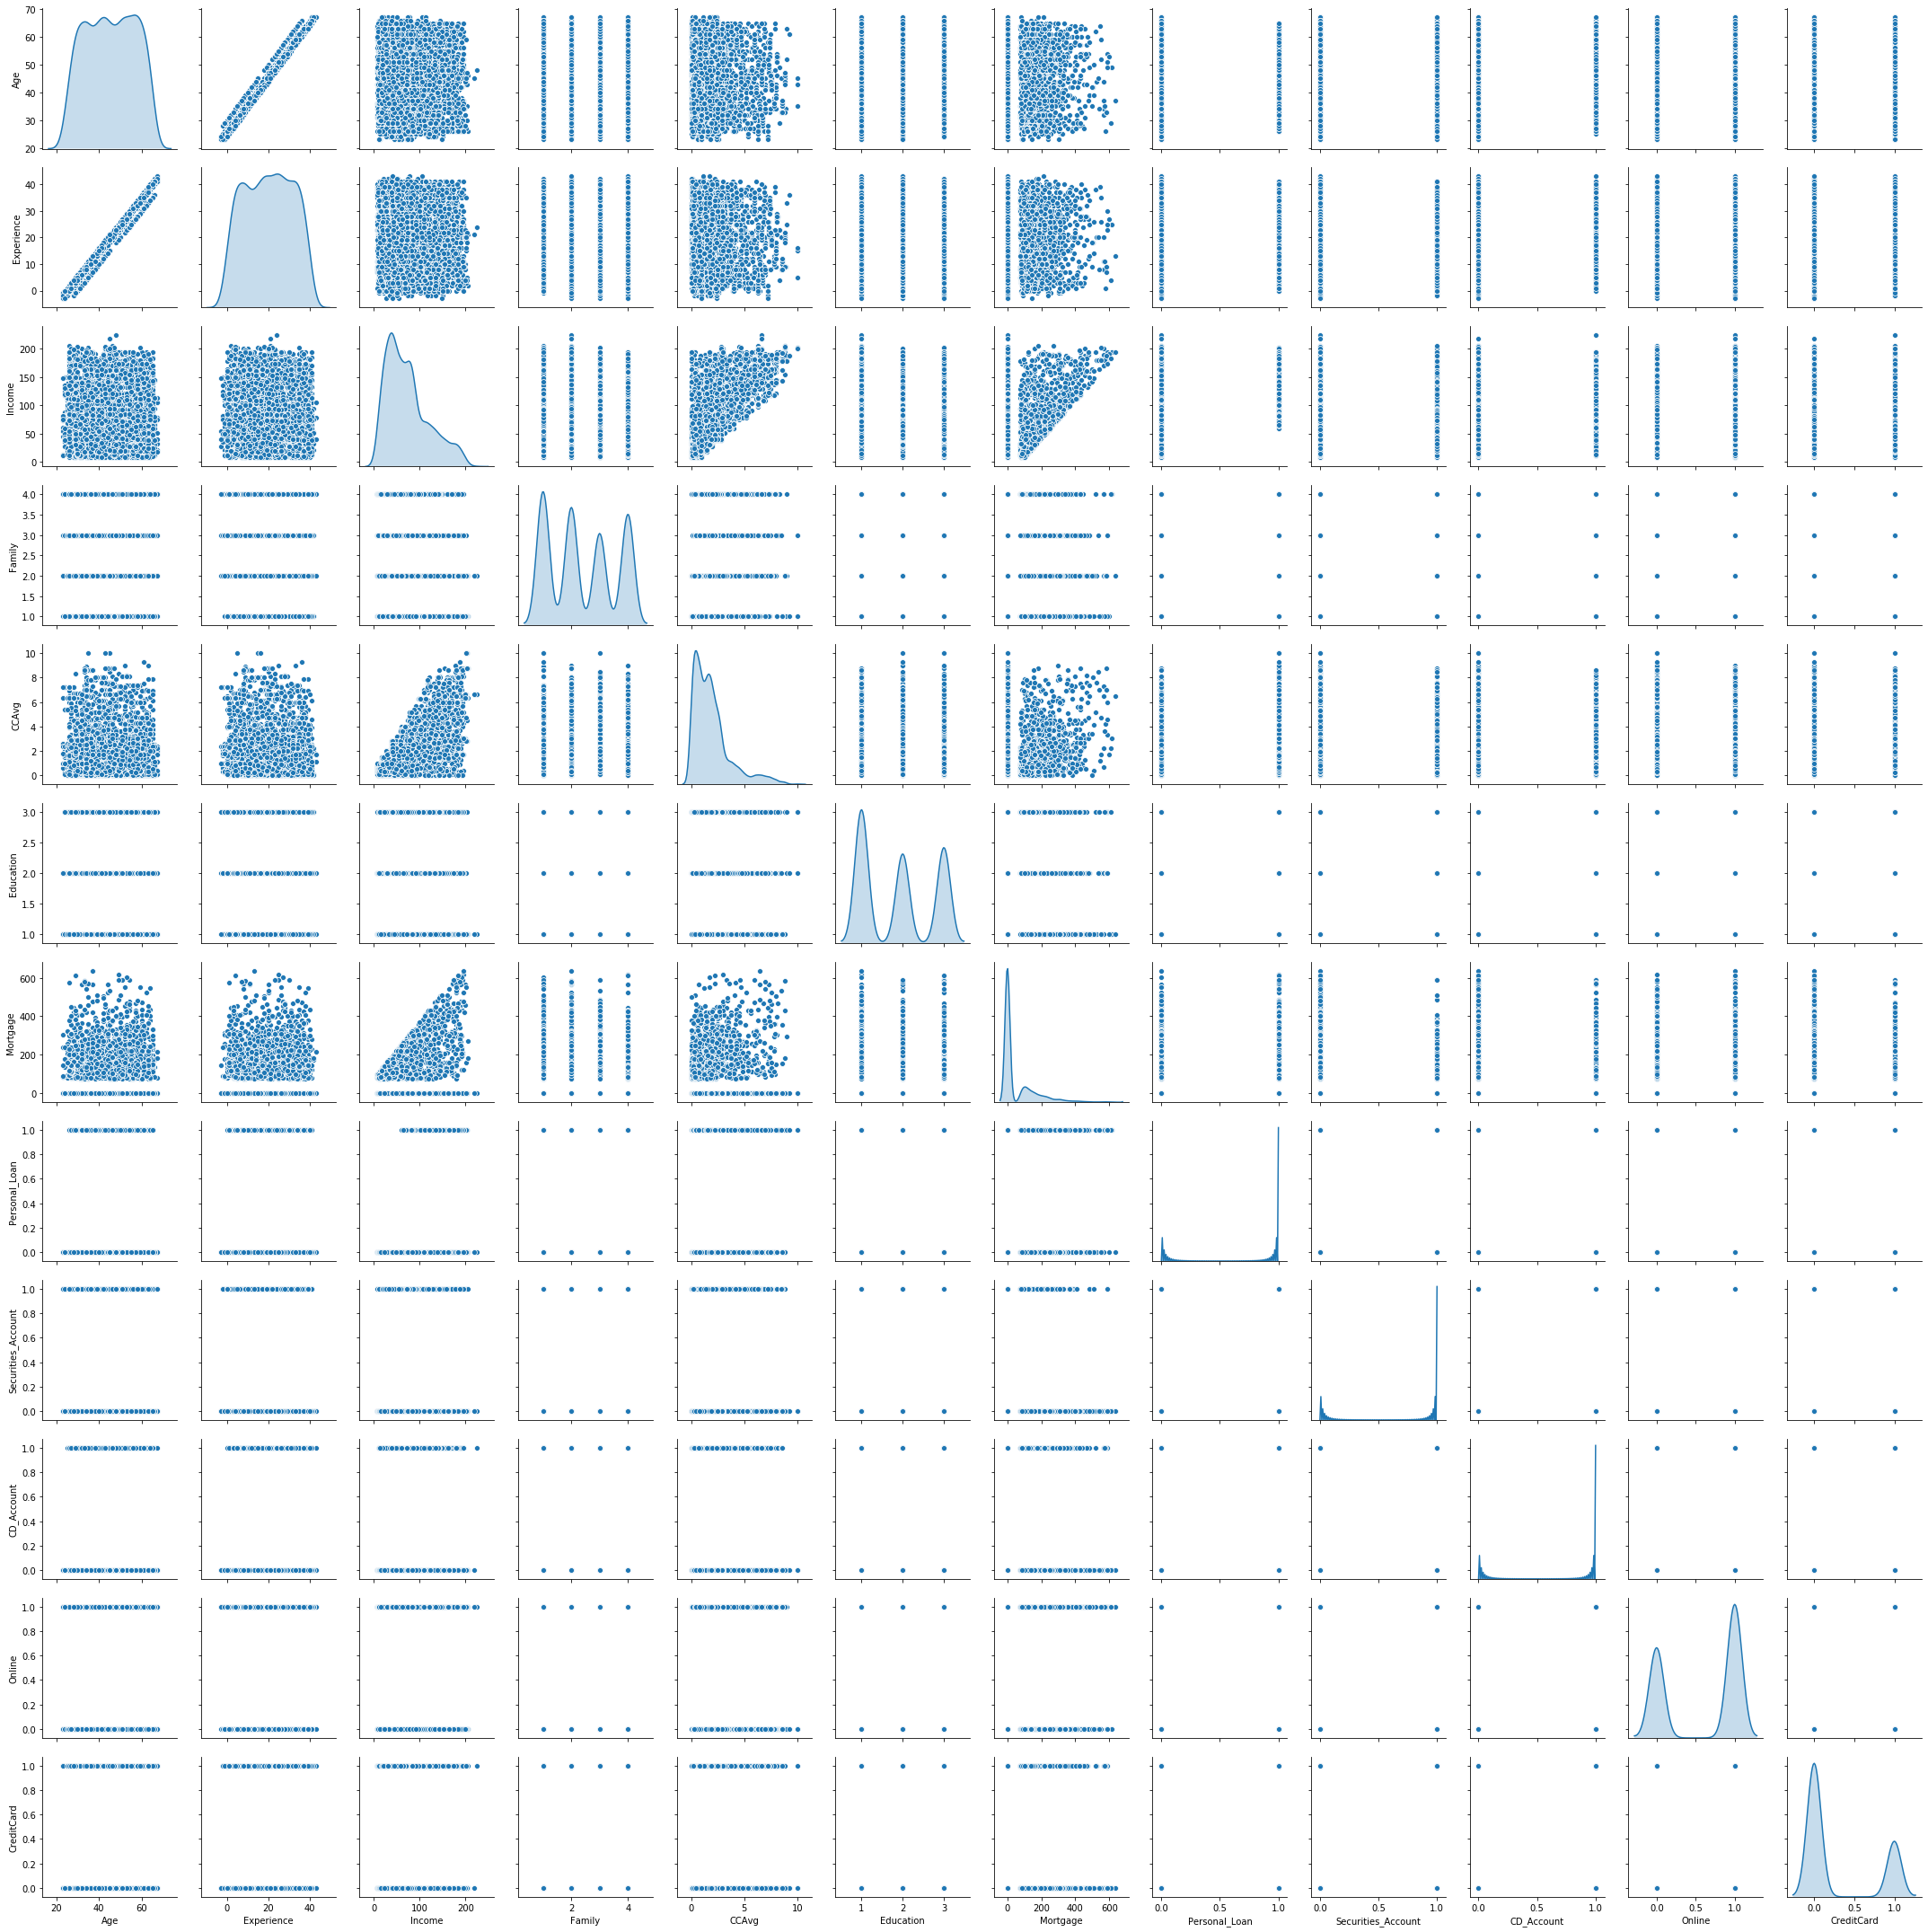

In [11]:
sns.pairplot(bank,diag_kind='kde')

## Checking Personal Loan ratio

In [12]:
n_true = len(bank.loc[bank['Personal_Loan'] == 1])
n_false = len(bank.loc[bank['Personal_Loan'] == 0])
print("Number of true cases: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of false cases: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Number of true cases: 480 (9.60%)
Number of false cases: 4520 (90.40%)


In [13]:
#We can see high number of False cases, where people do not opt for Personal Loan

## 4: Spliting the data <br>We will use 70% of data for training and 30% for testing.

In [14]:
from sklearn.model_selection import train_test_split

X = bank.drop('Personal_Loan',axis=1)     # Predictor feature columns (8 X m)
Y = bank['Personal_Loan']   # Predicted class (1=True, 0=False) (1 X m)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number

x_train.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
1334,47,22,35,2,1.3,1,0,0,0,1,0
4768,38,14,39,1,2.0,2,0,0,0,1,0
65,59,35,131,1,3.8,1,0,0,0,1,1
177,29,3,65,4,1.8,2,244,0,0,0,0
4489,39,13,21,3,0.2,2,0,0,0,1,0


In [15]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(bank.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(bank.index)) * 100))

70.00% data is in training set
30.00% data is in test set


## Now lets check Loan True/False ratio in split data

In [16]:
print("Original Loan True Values    : {0} ({1:0.2f}%)".format(len(bank.loc[bank['Personal_Loan'] == 1]), (len(bank.loc[bank['Personal_Loan'] == 1])/len(bank.index)) * 100))
print("Original Loan False Values   : {0} ({1:0.2f}%)".format(len(bank.loc[bank['Personal_Loan'] == 0]), (len(bank.loc[bank['Personal_Loan'] == 0])/len(bank.index)) * 100))
print("")
print("Training Loan True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Loan False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Loan True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Loan False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Loan True Values    : 480 (9.60%)
Original Loan False Values   : 4520 (90.40%)

Training Loan True Values    : 331 (9.46%)
Training Loan False Values   : 3169 (90.54%)

Test Loan True Values        : 149 (9.93%)
Test Loan False Values       : 1351 (90.07%)



## Data Preparation
### Check hidden missing values 

In [17]:
x_train.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
1334,47,22,35,2,1.3,1,0,0,0,1,0
4768,38,14,39,1,2.0,2,0,0,0,1,0
65,59,35,131,1,3.8,1,0,0,0,1,1
177,29,3,65,4,1.8,2,244,0,0,0,0
4489,39,13,21,3,0.2,2,0,0,0,1,0


In [18]:
#There are no missing values, the 0's in the columns on the right are not missing values, they are categorical.

# <center> <font color="blue"> 5: Logistic Regression

In [19]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)

coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0 -0.407357  0.405929  0.049157  0.651859  0.162409  1.655955  0.000794   

         7         8         9        10  intercept  
0 -0.90572  3.274688 -0.582966 -1.013023  -2.349476  


In [20]:
model_score = model.score(x_test, y_test)
print(model_score)

0.9453333333333334


## 6: Confusion Matrix

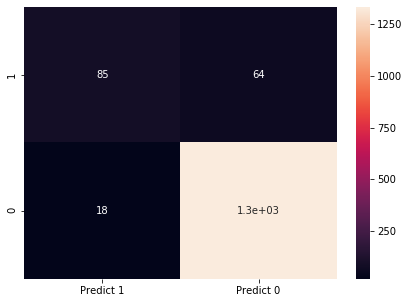

In [21]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

The confusion matrix

True Positives (TP): we correctly predicted people buying the loan 85

True Negatives (TN): we correctly predicted people not buying the loan 1300

False Positives (FP): we incorrectly predicted people buying the loan (a "Type I error") 18 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted people not buying the loan (a "Type II error") 64 Falsely predict negative Type II error

# <center><font color="blue">5: K-NN

## Build Model

In [22]:
NNH = KNeighborsClassifier(n_neighbors= 10 , weights = 'distance' )

In [23]:
# Call Nearest Neighbour algorithm

NNH.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='distance')

In [24]:
# Create a separate dataframe consisting only of the features i.e independent attributes

X = bank.drop(labels= "Personal_Loan" , axis = 1)
y = bank["Personal_Loan"]
X.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1


In [25]:
# convert the features into z scores as we do not know what units / scales were used and store them in new dataframe
# It is always adviced to scale numeric attributes in models that calculate distances.

XScaled  = X.apply(zscore)  # convert all attributes to Z scale 

XScaled.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03
mean,2.478018e-17,-1.693312e-16,1.939449e-16,7.850609e-16,-2.078338e-17,-6.315837e-16,2.810197e-16,5.092149e-16,4.426903e-16,2.986500e-16,-3.697931e-16
std,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00
min,-1.948906e+00,-2.014911e+00,-1.428969e+00,-1.216855e+00,-1.108987e+00,-1.049078e+00,-5.555239e-01,-3.414233e-01,-2.535403e-01,-1.216618e+00,-6.453143e-01
25%,-9.019702e-01,-8.812043e-01,-7.554825e-01,-1.216855e+00,-7.084116e-01,-1.049078e+00,-5.555239e-01,-3.414233e-01,-2.535403e-01,-1.216618e+00,-6.453143e-01
50%,-2.952359e-02,-9.121982e-03,-2.123482e-01,-3.454321e-01,-2.506106e-01,1.417029e-01,-5.555239e-01,-3.414233e-01,-2.535403e-01,8.219509e-01,-6.453143e-01
75%,8.429230e-01,8.629604e-01,5.263146e-01,5.259909e-01,3.216407e-01,1.332484e+00,4.375576e-01,-3.414233e-01,-2.535403e-01,8.219509e-01,1.549632e+00
max,1.889859e+00,1.996667e+00,3.263712e+00,1.397414e+00,4.613525e+00,1.332484e+00,5.688108e+00,2.928915e+00,3.944146e+00,8.219509e-01,1.549632e+00


## 6: Evaluate Performance of kNN Model

In [26]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

predicted_labels = NNH.predict(x_test)
NNH.score(x_test, y_test)

0.908

Confusion Matrix


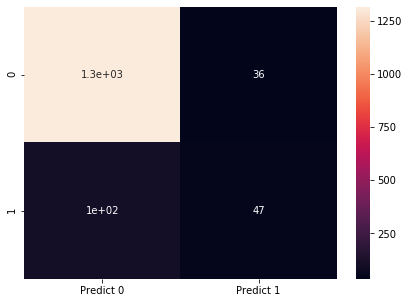

In [27]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics

print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, predicted_labels, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in [0,1]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

The confusion matrix

True Positives (TP): we correctly predicted people buying the loan 47

True Negatives (TN): we correctly predicted people not buying the loan 1300

False Positives (FP): we incorrectly predicted people buying the loan (a "Type I error") 36 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted people not buying the loan (a "Type II error") 100 Falsely predict negative Type II error

# <center><font color="blue">5: Naive Bayes algorithm 

## Train NB Algorithm

In [28]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

# creatw the model
bank_model = GaussianNB()

bank_model.fit(x_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

## Performance of our model with training data

In [30]:
bank_train_predict = bank_model.predict(x_train)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, bank_train_predict)))
print()

Model Accuracy: 0.8900



## Performance of our model with testing data

In [31]:
bank_test_predict = bank_model.predict(x_test)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, bank_test_predict)))
print()

Model Accuracy: 0.8747



## 6: Confusion matrix and classification report 

Confusion Matrix


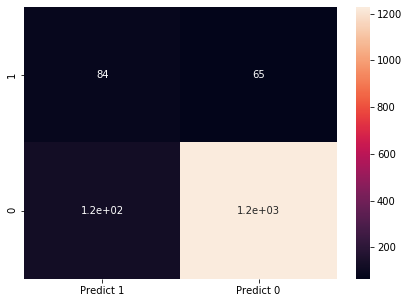

In [32]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, bank_test_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

The confusion matrix

True Positives (TP): we correctly predicted people buying the loan 84

True Negatives (TN): we correctly predicted people not buying the loan 1200

False Positives (FP): we incorrectly predicted people buying the loan (a "Type I error") 120 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted people not buying the loan (a "Type II error") 65 Falsely predict negative Type II error<br><br><br><br>

# <center>7: Conclusion

Therefore, we can see the accuracy for all the above models and find out:<br>
   <b> Logistic Reg: 94.5</b><br>
   <b> KNN: 90.8</b><br>
   <b> Naive Bayes: 87.47</b><br>
        
The confusion Matrix for the above three models are:

<b>Logistic Regression</b>

True Positives (TP): we correctly predicted people buying the loan 85

True Negatives (TN): we correctly predicted people not buying the loan 1300

False Positives (FP): we incorrectly predicted people buying the loan (a "Type I error") 18 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted people not buying the loan (a "Type II error") 64 Falsely predict negative Type II error

<b>KNN</b>

True Positives (TP): we correctly predicted people buying the loan 47

True Negatives (TN): we correctly predicted people not buying the loan 1300

False Positives (FP): we incorrectly predicted people buying the loan (a "Type I error") 36 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted people not buying the loan (a "Type II error") 100 Falsely predict negative Type II error

<b>Naive Bayes</b>

True Positives (TP): we correctly predicted people buying the loan 84

True Negatives (TN): we correctly predicted people not buying the loan 1200

False Positives (FP): we incorrectly predicted people buying the loan (a "Type I error") 120 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted people not buying the loan (a "Type II error") 65 Falsely predict negative Type II error


        
        

## <center>Therefore, We can clearly see Logistic Regression is outperforming the other two in all aspects. This is the best model for the given Data set